# Face Recognition Using Convolutional Neural Networks

This notebook implements a convolutional neural network (CNN) to classify faces from the ORL dataset. The dataset contains grayscale images of 112x92 pixels, and this notebook demonstrates how to load the dataset, preprocess it, define and train a CNN, and evaluate its performance.

---

## Step 1: Import Libraries

We begin by importing the required libraries, including NumPy, Pandas, Matplotlib for data handling and visualization, TensorFlow/Keras for building the neural network, and mlxtend for plotting the confusion matrix.


In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
from mlxtend.plotting import plot_confusion_matrix

# Set Matplotlib inline for Jupyter
plt.style.use('ggplot')

## Step 2: Load and Explore the Data
We will load the dataset and explore its contents to understand the structure and shape of the data.

In [2]:
# Load the compressed ORL face dataset
face_data = np.load("ORL_faces.npz")

# Checking the contents of the file
print(face_data.files)  # This shows the names of the arrays inside the file

# Check the shapes of training and testing data
print("Train X shape:", face_data['trainX'].shape)  # Shape of the training images
print("Train Y shape:", face_data['trainY'].shape)  # Shape of the training labels
print("Test X shape:", face_data['testX'].shape)    # Shape of the testing images
print("Test Y shape:", face_data['testY'].shape)    # Shape of the testing labels

# Check the data types of the arrays
print("Train X dtype:", face_data['trainX'].dtype)
print("Test X dtype:", face_data['testX'].dtype)


['testY', 'testX', 'trainX', 'trainY']
Train X shape: (240, 10304)
Train Y shape: (240,)
Test X shape: (160, 10304)
Test Y shape: (160,)
Train X dtype: float64
Test X dtype: float64


## Step 3: Preprocessing the Data

Now, we will reshape the images to the format expected by the CNN and normalize the pixel values for better model performance.


In [3]:
# Reshaping the image data to include a channel dimension (for grayscale images)
X = face_data['trainX'].reshape(240, 112, 92, 1)    # Training images
x_test = face_data['testX'].reshape(160, 112, 92, 1) # Testing images
Y = face_data['trainY']                             # Training labels
y_test = face_data['testY']                         # Testing labels

# Normalize pixel values to the range [0, 1]
X = X / 255.0
x_test = x_test / 255.0

# Print the shapes after reshaping
print("Shape of training data (X):", X.shape)         # (240, 112, 92, 1)
print("Shape of test data (x_test):", x_test.shape)   # (160, 112, 92, 1)


Shape of training data (X): (240, 112, 92, 1)
Shape of test data (x_test): (160, 112, 92, 1)


## Step 4: Visualize Sample Data

Let’s visualize the first image from the dataset to understand the data structure.


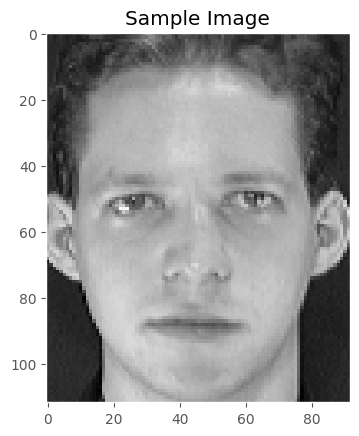

In [4]:
plt.imshow(X[0].reshape(112, 92), cmap='gray')  # Displaying the image
plt.grid(False)  # Disable the grid
plt.title("Sample Image")
plt.show()


## Step 5: Train-Validation Split

Split the training data into a training and validation set to evaluate the model during training.


In [5]:
# Split the data into training and validation sets (70% training, 30% validation)
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.3, random_state=21)

# Print the shapes of the training and validation sets
print(f"Training set size: {x_train.shape}")   # (168, 112, 92, 1)
print(f"Validation set size: {x_val.shape}")   # (72, 112, 92, 1)


Training set size: (168, 112, 92, 1)
Validation set size: (72, 112, 92, 1)


## Step 6: Build the CNN Model

We define a convolutional neural network (CNN) model with multiple convolutional layers followed by max pooling, dropout, and dense layers for classification.


In [6]:
# Define the CNN model
cnn_model1 = Sequential()

# Adding the Input layer explicitly
cnn_model1.add(Input(shape=(112, 92, 1)))

# First convolutional layer with 64 filters, followed by max pooling
cnn_model1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

# Max pooling layer
cnn_model1.add(MaxPool2D(pool_size=(2, 2)))

# Second convolutional layer with 32 filters, followed by max pooling
cnn_model1.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
cnn_model1.add(MaxPool2D(pool_size=(2, 2)))

# Third convolutional layer with 32 filters, followed by max pooling
cnn_model1.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
cnn_model1.add(MaxPool2D(pool_size=(2, 2)))

# Flatten the output to pass to fully connected layers
cnn_model1.add(Flatten())

# Adding dense layers with dropout
cnn_model1.add(Dense(512, activation='relu'))
cnn_model1.add(Dropout(0.2))

cnn_model1.add(Dense(256, activation='relu'))
cnn_model1.add(Dropout(0.2))

cnn_model1.add(Dense(128, activation='relu'))
cnn_model1.add(Dropout(0.2))

# Output layer with 20 neurons for 20 possible classes
cnn_model1.add(Dense(20, activation='softmax'))

# Display the model summary
cnn_model1.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 112, 92, 64)    │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 56, 46, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 56, 46, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 28, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 23, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4928)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,523,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │         2,580 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,718,804 (10.37 MB)

 Trainable params: 2,718,804 (10.37 MB)

 Non-trainable params: 0 (0.00 B)

## Step 7: Compile the Model

We will compile the model using the Adam optimizer and a learning rate schedule with an exponential decay.


In [7]:
# Learning rate decay schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,  # Initial learning rate
    decay_steps=30,               # Decay every 30 steps
    decay_rate=0.83,              # Decay rate of 0.83
    staircase=True                # Apply decay in steps
)

# Compile the model with Adam optimizer and sparse categorical crossentropy loss
cnn_model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])


## Step 8: Train the Model

Train the model using the training set, and validate it on the validation set. We will train the model for 35 epochs with a batch size of 16.


In [8]:
# Train the CNN model on the training data and validate on the validation data
history1 = cnn_model1.fit(x_train, y_train, batch_size=16, epochs=35, validation_data=(x_val, y_val), verbose=1)


Epoch 1/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.0329 - loss: 3.0075 - val_accuracy: 0.0000e+00 - val_loss: 3.0003
Epoch 2/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0696 - loss: 2.9945 - val_accuracy: 0.0000e+00 - val_loss: 3.0106
Epoch 3/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0542 - loss: 2.9728 - val_accuracy: 0.0000e+00 - val_loss: 3.0858
Epoch 4/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0803 - loss: 2.9660 - val_accuracy: 0.0278 - val_loss: 3.0210
Epoch 5/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0506 - loss: 2.9681 - val_accuracy: 0.0000e+00 - val_loss: 3.0031
Epoch 6/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0862 - loss: 2.9118 - val_accuracy: 0.0833 - val_loss: 2.9026
Epoch 7/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.1463 - loss: 2.7209 - val_accuracy: 0.2917 - val_loss: 2.5542
Epoch 8/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2139 - loss: 2.4571 - val_accu

## Step 9: Plot Training History

We will plot the training and validation accuracy and loss over the epochs to visualize the learning process.


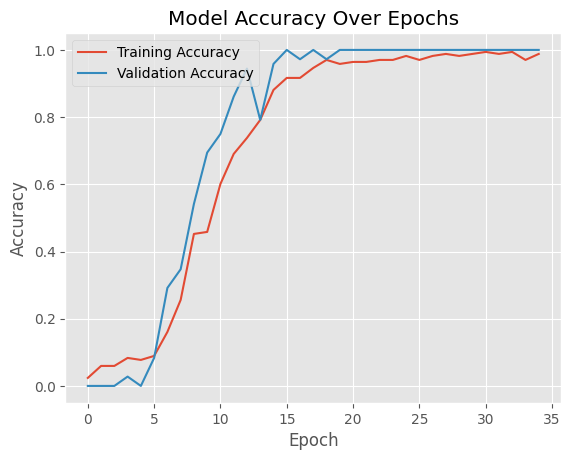

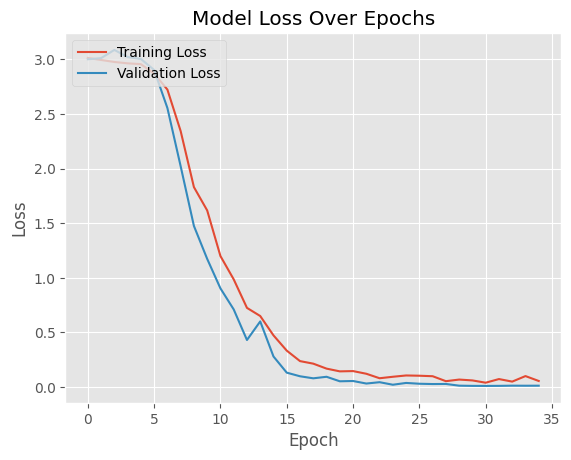

In [9]:
# Plotting training and validation accuracy
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plotting training and validation loss
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


## Step 10: Model Evaluation

We will evaluate the model’s performance on the training, validation, and test datasets using classification reports and confusion matrices.


In [10]:
# Function to get predictions from the model
def get_preds(elem_list):
    """
    Returns the predicted class indices from a list of prediction arrays.
    
    Args:
        elem_list (list): List of arrays where each array contains class probabilities or logits.
    
    Returns:
        list: List of predicted class indices corresponding to the maximum value in each prediction array.
    """
    return [np.argmax(elem) for elem in elem_list]


# Function to generate classification report and plot confusion matrix
def get_report(x, y, class_labels, user_model):
    """
    Generates a classification report and plots a confusion matrix for the given data and model.
    
    Args:
        x (array-like): Input data for predictions.
        y (array-like): True labels for the data.
        class_labels (list): List of class labels for the confusion matrix.
        user_model (keras.Model): The trained model used to predict the labels.
    
    Returns:
        None: Prints classification report and plots the confusion matrix.
    """
    # Get predictions from the model
    preds = get_preds(user_model.predict(x))  
    
    # Print classification report showing precision, recall, f1-score, and support for each class
    print(classification_report(y, preds))    
    
    # Compute confusion matrix
    cm = confusion_matrix(y, preds)           
    
    # Plot confusion matrix
    plot_confusion_matrix(cm, figsize=(8,8), class_names=class_labels)  
    
    # Print statement to indicate the confusion matrix is displayed
    print('CONFUSION MATRIX:')
    
    # Ensure the confusion matrix is rendered in the notebook
    plt.show()  


# Get unique class names
class_names = np.unique(Y)

*** TRAINING REPORT ***
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00         8
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00         7
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00         8
          16       

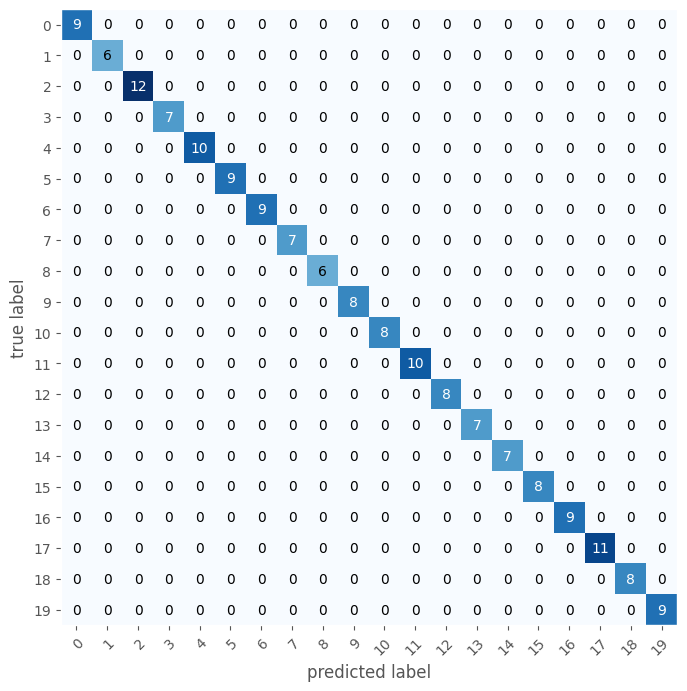

In [11]:
# Evaluate on training set
print("*** TRAINING REPORT ***")
get_report(x_train, y_train, class_names, cnn_model1)

*** VALIDATION REPORT ***
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         8
           4       1.00      0.75      0.86         8
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         8
           7       0.80      1.00      0.89         8
           8       1.00      1.00      1.00         8
           9       1.00      0.75      0.86         8
          10       0.80      1.00      0.89         8
          11       1.00      1.00      1.00         8
          12       0.89      1.00      0.94         8
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         8
          15       1.00      0.62      0.77         8
          16     

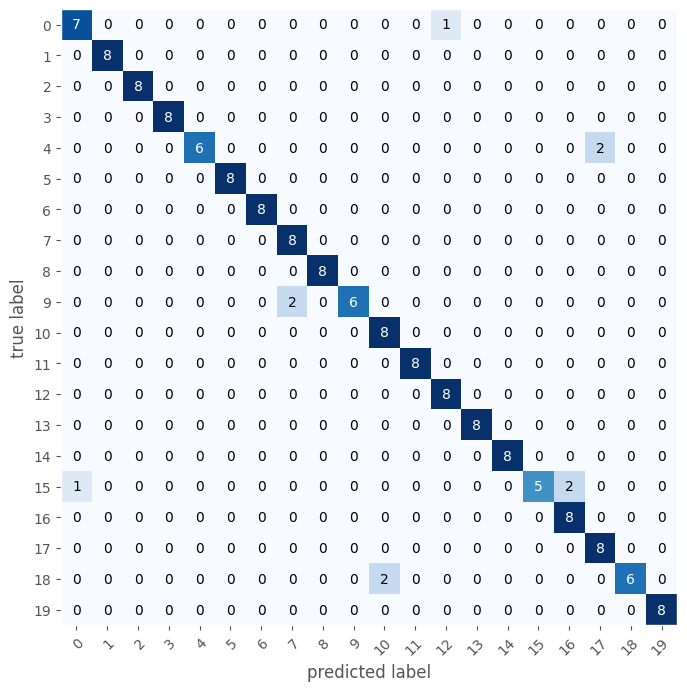

In [12]:
# Evaluate on validation set
print("*** VALIDATION REPORT ***")
get_report(x_test, y_test, class_names, cnn_model1)